Statistics for Artificial Intelligence and Data Science


Additional Analysis of the Storks Data



 1. Part 1.1: : Implement two regression models for the number of births
     1. Fitting regression model
     1. plot and metrices
     1. Scatter plots
   
 2. Part 1:2 Use of bootstrap to compare r2
     1. Calculating difference
     1. Plotting distribution of the differences
     1. Estimating confidence intervals
    
 3. Part 2.1: Implementation of the regression models for the number of storks
     1. Fitting regression model
     1. plot and metrices
     1. Scatter plots
    
 4. Part 2.2: Use of bootstrap to compare RMSE
     1. Calculating difference
     1. Plotting distribution of the differences
     1. Estimating confidence intervals
    
    

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from math import sqrt
%matplotlib inline

## Part 1.1: : Implement two regression models for the number of births

In [ ]:
df1 = pd.read_csv('storks.csv')
df1

,Country,Area,Storks,Humans,BirthRate,SuitableAreaPercent
0,Albania,28750,100,3.2,83,55.68
1,Austria,83860,300,7.6,87,38.34
2,Belgium,30520,1,9.9,118,65.93
3,Bulgaria,111000,5000,9.0,117,57.99
4,Denmark,43100,9,5.1,59,81.46
5,France,544000,140,56.0,774,58.47
6,Germany,357000,3300,78.0,901,59.81
7,Greece,132000,2500,10.0,106,47.31
8,Holland,41900,4,15.0,188,70.96
9,Hungary,93000,5000,11.0,124,75.86


### Scatter plots 

<AxesSubplot:xlabel='Humans', ylabel='BirthRate'>

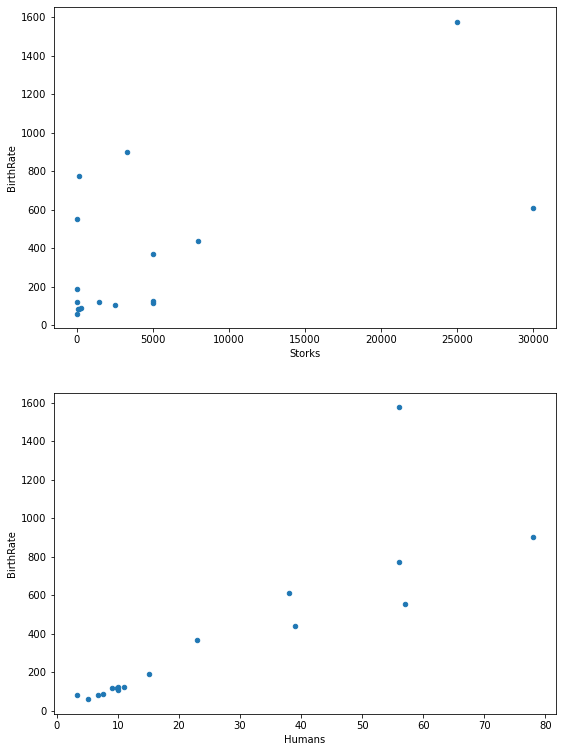

In [ ]:
fig, (a1,a2) = plt.subplots(2, 1, figsize=(9,13))

df1.plot(kind='scatter',  x='Storks', y='BirthRate', ax=a1)
df1.plot(kind='scatter',  x='Humans', y='BirthRate', ax=a2)


### The fit of the regression models

In [ ]:
y1 = df1.BirthRate
X1 = np.column_stack([df1.Storks])

In [ ]:
reg = LinearRegression().fit(X1, y1)
y1_hat = reg.predict(X1)
print('The R2 coefficient of determination is %4.3f' % reg.score(X1, y1))
print('The intercept is %4.1f' % reg.intercept_)
beta_BirthRate = reg.coef_
print('Estimated regression coefficient  is %4.2f' % beta_BirthRate)
print('Root of the mean squared error: %.2f'% mean_squared_error(y1, y1_hat, squared=False))


The R2 coefficient of determination is 0.385
The intercept is 225.0
Estimated regression coefficient  is 0.03
Root of the mean squared error: 312.03


### plots and metrics

Text(0, 0.5, 'Actual Value')

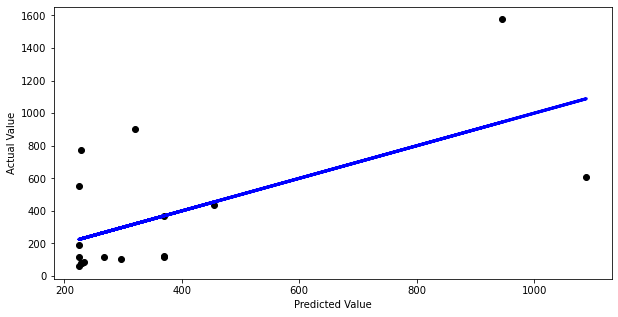

In [ ]:
# Plot outputs
fig, a = plt.subplots(1,1,figsize=(10,5))
a.scatter(y1_hat, y1,  color='black')
a.plot(y1_hat, y1_hat, color='blue', linewidth=3)

# two_std = residuals.std() * 2
# a.errorbar(y_hat, y, yerr=two_std, fmt='.k')

a.set_xlabel('Predicted Value')
a.set_ylabel('Actual Value')

### Population size

In [ ]:
y2 = df1.BirthRate
X2 = np.column_stack([df1.Humans])

### Fit regression model

In [ ]:
reg = LinearRegression().fit(X2, y2)
y2_hat = reg.predict(X2)
print('The R2 coefficient of determination is %4.3f' % reg.score(X2, y2))
print('The intercept is %4.1f' % reg.intercept_)
beta_BirthRate = reg.coef_
print('Estimated regression coefficient for Humans is %4.2f' % beta_BirthRate)
print('Root of the mean squared error: %.2f'% mean_squared_error(y2, y2_hat, squared=False))

The R2 coefficient of determination is 0.725
The intercept is -8.4
Estimated regression coefficient for Humans is 14.83
Root of the mean squared error: 208.78


### Plot & metrices

Text(0, 0.5, 'Actual Value')

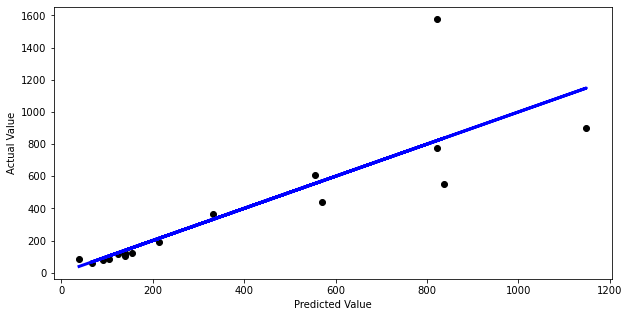

In [ ]:
# Plot outputs
fig, a = plt.subplots(1,1,figsize=(10,5))
a.scatter(y2_hat, y2,  color='black')
a.plot(y2_hat, y2_hat, color='blue', linewidth=3)

# two_std = residuals.std() * 2
# a.errorbar(y_hat, y, yerr=two_std, fmt='.k')

a.set_xlabel('Predicted Value')
a.set_ylabel('Actual Value')

## Part 1.2 The bootstrap distribution

In [ ]:
def bootstrapC(data, cols, repeats, func):
    result = pd.DataFrame(data = dict([(c, np.empty(repeats)) for c in cols]))
    
    for i in range(0, repeats):
        result.iloc[i] = func(resample(data)) # default is to resample, same size
    return result

import warnings
warnings.filterwarnings('ignore')

In [ ]:

country_t = pd.CategoricalDtype(categories=['Albania', 'Austria', 'Belgium', 'Bulgaria', 'Denmark', 'France', 'Germany', 'Greece', 'Holland', 'Hungary', 'Italy', 'Poland', 'Portugal', 'Romania', 'Spain', 'Switzerland', 'Turkey'], ordered=False)
types_dict = {'Country':country_t}


Stroks = pd.read_csv('storks.csv', dtype = types_dict)
Stroks

,Country,Area,Storks,Humans,BirthRate,SuitableAreaPercent
0,Albania,28750,100,3.2,83,55.68
1,Austria,83860,300,7.6,87,38.34
2,Belgium,30520,1,9.9,118,65.93
3,Bulgaria,111000,5000,9.0,117,57.99
4,Denmark,43100,9,5.1,59,81.46
5,France,544000,140,56.0,774,58.47
6,Germany,357000,3300,78.0,901,59.81
7,Greece,132000,2500,10.0,106,47.31
8,Holland,41900,4,15.0,188,70.96
9,Hungary,93000,5000,11.0,124,75.86


In [ ]:
def doRegression(Stroks) :
    y3 = Stroks.BirthRate
    X3= np.column_stack([Stroks.Storks])
    y4 = Stroks.BirthRate
    X4= np.column_stack([Stroks.Humans])
    reg3 = LinearRegression().fit(X3, y3)
    reg4 = LinearRegression().fit(X4, y4)
    beta_Storks = reg3.coef_
    beta_Humans = reg4.coef_
    return [reg3.intercept_, beta_Storks, reg3.score(X3, y3),reg4.intercept_, beta_Humans, reg4.score(X4, y4),] 

boot_data = bootstrapC(Stroks, ['Intercept_Storks', 'Beta_Storks', 'R2_Storks', 'Intercept_Humans', 'Beta_Humans', 'R2_Humans' ], 500, doRegression) 

boot_data
    
    

,Intercept_Storks,Beta_Storks,R2_Storks,Intercept_Humans,Beta_Humans,R2_Humans
0,174.073703,0.015606,0.216334,24.870096,11.220367,0.945012
1,381.999382,-0.000179,0.000003,14.392652,11.414274,0.958533
2,312.873600,0.024014,0.243515,8.328485,12.959398,0.699400
3,337.173042,0.035593,0.528910,-13.570995,16.994185,0.605587
4,120.393151,0.032692,0.553663,-99.135442,23.567075,0.864645
...,...,...,...,...,...,...
495,135.566039,0.054838,0.804712,-81.594416,20.447439,0.754348
496,158.435922,0.025490,0.500936,-51.694363,17.456311,0.701454
497,282.225926,0.046842,0.361472,25.796911,12.734999,0.742136
498,246.761656,0.045656,0.476257,-19.453658,14.428410,0.683663


### Difference in the r2 parameter

In [ ]:
boot_data['R2_Diff'] = boot_data['R2_Humans'] - boot_data['R2_Storks']
boot_data

,Intercept_Storks,Beta_Storks,R2_Storks,Intercept_Humans,Beta_Humans,R2_Humans,R2_Diff
0,174.073703,0.015606,0.216334,24.870096,11.220367,0.945012,0.728678
1,381.999382,-0.000179,0.000003,14.392652,11.414274,0.958533,0.958530
2,312.873600,0.024014,0.243515,8.328485,12.959398,0.699400,0.455885
3,337.173042,0.035593,0.528910,-13.570995,16.994185,0.605587,0.076678
4,120.393151,0.032692,0.553663,-99.135442,23.567075,0.864645,0.310982
...,...,...,...,...,...,...,...
495,135.566039,0.054838,0.804712,-81.594416,20.447439,0.754348,-0.050364
496,158.435922,0.025490,0.500936,-51.694363,17.456311,0.701454,0.200519
497,282.225926,0.046842,0.361472,25.796911,12.734999,0.742136,0.380664
498,246.761656,0.045656,0.476257,-19.453658,14.428410,0.683663,0.207406


### Plotting a distribution of the differences

<AxesSubplot:>

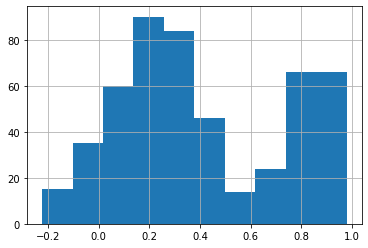

In [ ]:
boot_data['R2_Diff'].hist()

### The CI is given by the quantiles of the R2_Diff.

In [ ]:
print('90%% range is %4.3f to %4.3f' % 
      (boot_data.R2_Diff.quantile(0.1), boot_data.R2_Diff.quantile(0.9)))
print('95%% range is %4.3f to %4.3f' % 
      (boot_data.R2_Diff.quantile(0.05), boot_data.R2_Diff.quantile(0.95)))
print('99%% range is %4.3f to %4.3f' % 
      (boot_data.R2_Diff.quantile(0.01), boot_data.R2_Diff.quantile(0.99)))

90% range is 0.019 to 0.878
95% range is -0.057 to 0.933
99% range is -0.146 to 0.964


## Part 2.1: Implementation of the regression models for the number of storks

### The fit of the regression models

### Fit the regression model (Predictor land area)

In [ ]:
y5 = df1.Storks
X5 = np.column_stack([df1.Area])

In [ ]:
reg5 = LinearRegression().fit(X5, y5)
y5_hat = reg5.predict(X5)
print('The R2 coefficient of determination is %4.3f' % reg5.score(X5, y5))
print('The intercept is %4.1f' % reg5.intercept_)
beta_Storks = reg.coef_
print('Estimated regression coefficient  is %4.2f' % beta_Storks)
print('Root of the mean squared error: %.2f'% mean_squared_error(y5, y5_hat, squared=False))

The R2 coefficient of determination is 0.336
The intercept is -60.7
Estimated regression coefficient  is 14.83
Root of the mean squared error: 6984.77


### plots and metrics

Text(0, 0.5, 'Actual Value')

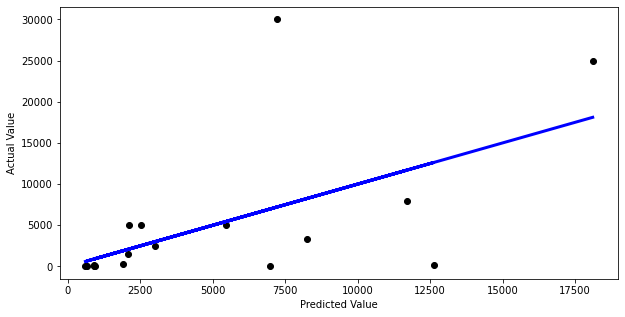

In [ ]:
# Plot outputs
fig, a = plt.subplots(1,1,figsize=(10,5))
a.scatter(y5_hat, y5,  color='black')
a.plot(y5_hat, y5_hat, color='blue', linewidth=3)

# two_std = residuals.std() * 2
# a.errorbar(y_hat, y, yerr=two_std, fmt='.k')

a.set_xlabel('Predicted Value')
a.set_ylabel('Actual Value')

### Adding column for population density and area of suitable land

In [ ]:
df1['PopDen'] = df1['Humans']/df1['Area']
df1['AreaSuitLand']=df1['Area']*df1['SuitableAreaPercent']/100
df1

,Country,Area,Storks,Humans,BirthRate,SuitableAreaPercent,PopDen,AreaSuitLand
0,Albania,28750,100,3.2,83,55.68,0.000111,16008.000
1,Austria,83860,300,7.6,87,38.34,0.000091,32151.924
2,Belgium,30520,1,9.9,118,65.93,0.000324,20121.836
3,Bulgaria,111000,5000,9.0,117,57.99,0.000081,64368.900
4,Denmark,43100,9,5.1,59,81.46,0.000118,35109.260
5,France,544000,140,56.0,774,58.47,0.000103,318076.800
6,Germany,357000,3300,78.0,901,59.81,0.000218,213521.700
7,Greece,132000,2500,10.0,106,47.31,0.000076,62449.200
8,Holland,41900,4,15.0,188,70.96,0.000358,29732.240
9,Hungary,93000,5000,11.0,124,75.86,0.000118,70549.800


### Scatter plots

<AxesSubplot:xlabel='AreaSuitLand', ylabel='Storks'>

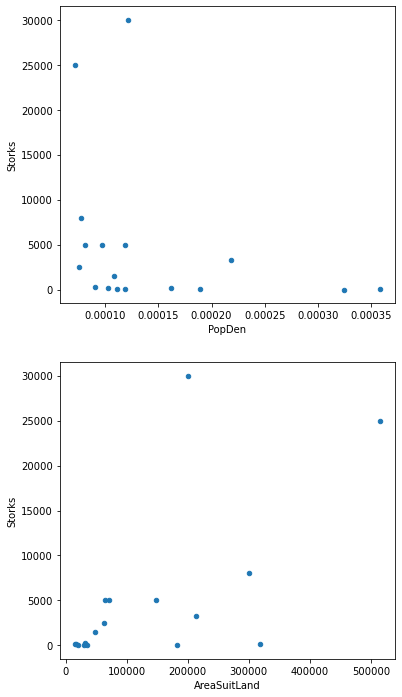

In [ ]:
fig, (a1,a2) = plt.subplots(2, 1, figsize=(6,12))

df1.plot(kind='scatter',  x='PopDen', y='Storks', ax=a1)
df1.plot(kind='scatter',  x='AreaSuitLand', y='Storks', ax=a2)



### Fit regression model(Area of suitable land)

In [ ]:
y6 = df1.Storks 
X6 = np.column_stack((df1.PopDen, df1.AreaSuitLand))

In [ ]:
reg6 = LinearRegression().fit(X6, y6)
print('The R2 coefficient of determination is %4.3f' % reg6.score(X6, y6))
print('The intercept is %4.1f' % reg6.intercept_)
beta_PopDen, beta_AreaSuitLand = reg6.coef_
print('Estimated regression coefficient for PopDen is %4.2f' % beta_PopDen, 
      'change of number of Strokes per PopDen')
print('Estimated regression coefficient for RestAreaSuitLand  is %4.2f' % beta_AreaSuitLand, 
      'change of number of Strokes per AreaSuitLand')

y6_hat = reg6.predict(X6)
print('Root of the mean squared error: %.2f'% mean_squared_error(y6, y6_hat, squared=False))

The R2 coefficient of determination is 0.393
The intercept is 1881.4
Estimated regression coefficient for PopDen is -12132597.89 change of number of Strokes per PopDen
Estimated regression coefficient for RestAreaSuitLand  is 0.04 change of number of Strokes per AreaSuitLand
Root of the mean squared error: 6677.03


### plots and metrics

Text(0, 0.5, 'Actual Value')

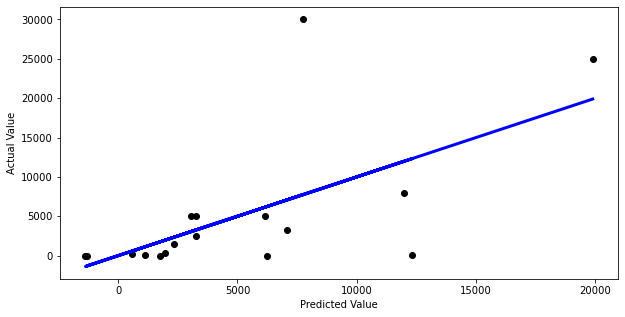

In [ ]:
# Plot outputs
fig, a = plt.subplots(1,1,figsize=(10,5))
a.scatter(y6_hat, y6,  color='black')
a.plot(y6_hat, y6_hat, color='blue', linewidth=3)

# two_std = residuals.std() * 2
# a.errorbar(y_hat, y, yerr=two_std, fmt='.k')

a.set_xlabel('Predicted Value')
a.set_ylabel('Actual Value')

## Part2.2 bootstrap to compare RMSE

In [ ]:
def doRMSE(df1) :
    y7 = df1.Storks
    X7= np.column_stack([df1.Area])
    
    y8 = df1.Storks
    X8= np.column_stack([df1.PopDen, df1.AreaSuitLand])
    
    reg7 = LinearRegression().fit(X7, y7)
    reg8 = LinearRegression().fit(X8, y8)
    
    
    beta_Area = reg7.coef_
    beta_PopDen, beta_AreaSuitLand = reg8.coef_
    
    y7_hat = reg7.predict(X7)
    RMSE7 = sqrt(mean_squared_error(y7,y7_hat))
    
    y8_hat = reg8.predict(X8)
    RMSE8 = sqrt(mean_squared_error(y8,y8_hat))
    
    return [reg7.intercept_, beta_Area, reg7.score(X7, y7),RMSE7, reg8.intercept_, beta_PopDen, beta_AreaSuitLand, reg8.score(X8, y8),RMSE8] 

boot_RMSE = bootstrapC(df1, [ 'Intercept1', 'Beta_Area', 'R2_PopDen', 'RMSE7', 'Intercept2', 'Beta_PopDen', 'Beta_AreaSuitLand', 'R2_AreaSuitLand', 'RMSE8' ], 500, doRMSE) 

boot_RMSE
    

,Intercept1,Beta_Area,R2_PopDen,RMSE7,Intercept2,Beta_PopDen,Beta_AreaSuitLand,R2_AreaSuitLand,RMSE8
0,-1469.777217,0.022196,0.548302,5221.430858,243.691778,-1.281045e+07,0.034983,0.628231,4736.987113
1,-299.506478,0.033892,0.409353,7963.343813,2406.978882,-1.649417e+07,0.051215,0.447155,7704.299612
2,660.731872,0.017717,0.122420,6581.301096,1565.120663,-8.875254e+06,0.032278,0.161003,6435.000325
3,286.382382,0.014137,0.317713,4916.719108,1883.139400,-1.289018e+07,0.022816,0.400894,4607.270428
4,-709.982393,0.025477,0.437290,7487.028268,532.166362,-6.621923e+06,0.040078,0.489411,7131.864949
...,...,...,...,...,...,...,...,...,...
495,132.979850,0.024452,0.340084,6955.491795,2177.665456,-1.414610e+07,0.038969,0.401417,6624.388689
496,1626.936995,0.022340,0.223305,9099.178257,2772.386798,-1.102521e+07,0.037737,0.269052,8827.143327
497,945.729711,0.024160,0.136802,8296.088021,4141.584142,-2.720971e+07,0.044611,0.221181,7880.184937
498,1260.278879,0.004510,0.080743,2402.313957,4774.260827,-2.221381e+07,0.005077,0.415816,1915.077223


### Estimating RMSE difference

In [ ]:
boot_RMSE['RMSE_Diff'] =boot_RMSE['RMSE7'] - boot_RMSE['RMSE8']
boot_RMSE

,Intercept1,Beta_Area,R2_PopDen,RMSE7,Intercept2,Beta_PopDen,Beta_AreaSuitLand,R2_AreaSuitLand,RMSE8,RMSE_Diff
0,-1469.777217,0.022196,0.548302,5221.430858,243.691778,-1.281045e+07,0.034983,0.628231,4736.987113,484.443746
1,-299.506478,0.033892,0.409353,7963.343813,2406.978882,-1.649417e+07,0.051215,0.447155,7704.299612,259.044200
2,660.731872,0.017717,0.122420,6581.301096,1565.120663,-8.875254e+06,0.032278,0.161003,6435.000325,146.300771
3,286.382382,0.014137,0.317713,4916.719108,1883.139400,-1.289018e+07,0.022816,0.400894,4607.270428,309.448680
4,-709.982393,0.025477,0.437290,7487.028268,532.166362,-6.621923e+06,0.040078,0.489411,7131.864949,355.163319
...,...,...,...,...,...,...,...,...,...,...
495,132.979850,0.024452,0.340084,6955.491795,2177.665456,-1.414610e+07,0.038969,0.401417,6624.388689,331.103106
496,1626.936995,0.022340,0.223305,9099.178257,2772.386798,-1.102521e+07,0.037737,0.269052,8827.143327,272.034930
497,945.729711,0.024160,0.136802,8296.088021,4141.584142,-2.720971e+07,0.044611,0.221181,7880.184937,415.903085
498,1260.278879,0.004510,0.080743,2402.313957,4774.260827,-2.221381e+07,0.005077,0.415816,1915.077223,487.236733


### Plotting a distribution of the differences

<AxesSubplot:>

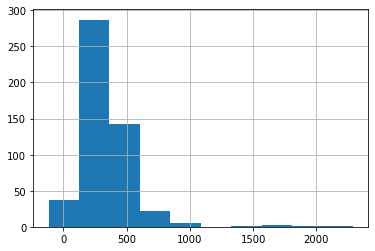

In [ ]:
boot_RMSE['RMSE_Diff'].hist()

### Confidence intervals for the difference in the RMSE values 

In [ ]:
print('90%% range is %4.3f to %4.3f' % 
      (boot_RMSE.RMSE_Diff.quantile(0.1), boot_RMSE.RMSE_Diff.quantile(0.9)))
print('95%% range is %4.3f to %4.3f' % 
      (boot_RMSE.RMSE_Diff.quantile(0.05), boot_RMSE.RMSE_Diff.quantile(0.95)))
print('99%% range is %4.3f to %4.3f' % 
      (boot_RMSE.RMSE_Diff.quantile(0.01), boot_RMSE.RMSE_Diff.quantile(0.99)))

90% range is 146.577 to 544.743
95% range is 88.871 to 657.359
99% range is 24.636 to 1414.385
